# Machine Learning
penerapan konsep Artificial Intelligence, teknik untuk membuat program (model) dengan memilih algoritma (step by step cara penyelesaian masalah) dan memberikan data (dataset).

## Terminology
- dataset - data yang kita gunakan untuk melatih model machine learning
- model - program yang kita buat dengan menggunakan algoritma machine learning + dataset untuk melatih algoritma tersebut
- features - bagian dari dataset yang kita gunakan untuk melatih algoritma ML
- target - untuk ML tipe supervised yang punya target, ini adalah data yang dibuat prediksi nya nanti. data awal punya target ini, dipakai untuk latihan. setelah selesai dilatih, modelnya prediksi target ini.

## Pembuatan Machine Learning
1. mengumpulkan data
2. merapikan data - cek missing values, invalid values, encoding (mengubah tipe data non-numerik jadi numerik), scaling (kekuatan setiap kolom fitur sama), split data jadi training dan testing data, dan lainnya
3. membuat dan melatih model machine learning - memilih algoritma machine learning, dan memilih opsi2 algoritma tersebut
4. evaluasi - tes seberapa akurat model kita dalam membuat prediksi
5. tuning - balik ke step 1-4 (tidak harus urut) untuk mencoba membuat model lebih akurat

## Tipe Machine Learning

### Supervised
punya features   
punya target   
model bisa membuat prediksi target berdasarkan features

#### Regression - target tipe angka continuous   
contoh: data tinggi dan berat badan murid-murid di kampus A. Kita gunakan tinggi sebagai fitur, dan berat sebagai target. Setelah melatih model ML, model tersebut bisa membuat prediksi berat badan seseorang berdasarkan tinggi badannya.

#### Classification - target tipe kategori
contoh: data orang orang yang checkup ke rumah sakit S. target data ada dua, yang sakit dan yang sehat, fiturnya adalah tingkat gula darah, tekanan darah, dan tingkat kolesterol.


### Unsupervised
punya features   
TIDAK punya target   

#### Clustering - mengelompokkan data
contoh: kita punya banyak data email, kita minta ML algoritma untuk memisahkan jadi 4 kelompok. algoritma akan pisahin seluruh data email2 kita jadi 4 kelompok. Setelah itu kita perlu lihat sendiri kira2 kenapa dijadikan 4 kelompok seperti ini, apa arti setiap kelompok, apa persamaannya, dan kita bisa kasih label per kelompok. misalkan ternyata dibagi menurut email promosi, email spam, email kerjaan, email personal.

#### Principal Component Analysis (PCA)
mengurangi jumlah dimensi yang kita gunakan untuk melatih ML. Tanpa menghapus fitur tertentu - ada algoritma PCA yang bisa menggabungkan banyak fitur kita menjadi satu. misal ada fitur tinggi, berat --> digabung jadi 2 kolom data yang masing2 adalah gabungan 2 fitur ini.

* ada banyak tipe unsupervised ML lainnya:
- Dimensionality Reduction
- Anomaly Detection
- Association Probelm


# Tipe Machine Learning Lainnya

## Reinforcement Learning
membuat model nya belajar dari kesalahan sendiri, latihan berulang ulang sampai model nya tau jalan mana yang paling banyak + poin (positive feedback)

## Deep Learning
Neural Network, cara membuat model yang menggunakan banyak layer kalkulasi. setiap layer ada formula matematika sendiri untuk mengubah data input. input -> kalkulasi per layer -> output. di setiap layer datanya sedikit berubah karena kalkulasi tersebut.

tujuan sama, dari input -> prediksi. dilatih juga menggunakan dataset.



# Regression
membuat garis regression y = ax + c dimana a dan c adalah angka numerik konstan misalnya 2 dan 3 --> y = 2x+3

formula matematika ini bisa kita tampilkan secara visual di grafik 2 dimensi, x di x-axis, y di y-axis, dan kita akan dapat sebuah garis lurus.

visualisasi regression biasanya hanya untuk saat kita punya 1 fitur saja, 1 fitur di x-axis, target di y-axis

## Linear Regression
dengan formula matematika y = ax + c


## Polynomial Regression
dengan formula matematika: 
- (degree 1) y = ax + c
- (degree 2) y = ax + bx2 + c 
- (degree 3) y = ax + bx2 + cx3 + d 
- dan seterusnya





# Case Study: Linear Regression untuk memprediksi harga mobil
data kita ambil dari kaggle https://www.kaggle.com/datasets/hellbuoy/car-price-prediction (link github https://raw.githubusercontent.com/stefkwan-h8/dataset/main/CarPrice_Assignment.csv)

Kita akan membuat model ML tipe Linear Regression untuk memprediksi harga mobil dari fitur-fitur yang diberikan.

In [33]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# import data
df_car = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/CarPrice_Assignment.csv")
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [22]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
features.head()

,horsepower
0,111
1,111
2,154
3,102
4,115


In [4]:
# rapikan data
# explore data
# remove missing values/ fill missing values
# remove invalid values
# split data jadi training dan testing dataset
# ... dan lainnya

# untuk case study kali ini kita skip

In [13]:
# misalkan dari contoh data ini, kita mau pakai fitur horsepower saja untuk memprediksi target price mobilnya:
features = df_car[["horsepower"]]
target = df_car["price"]

print(features.shape)
print(target.shape)

(205, 1)
(205,)


In [15]:
# bikin dan latih model
model = LinearRegression()

# latih model
# untuk melatih model, features harus dalam bentuk 2D, 1 fitur 1 kolom, 2 fitur 2 kolom
model.fit(features, target)

LinearRegression()

In [16]:
# evaluasi
# untuk model ML tipe regression kita bisa evaluasi menggunakan model.score
model.score(features, target)

0.653088356490231

In [17]:
# optional: membuat prediksi
# kalau horsepower 2000, harga mobil berapa?

model.predict([[2000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([322804.36044497])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


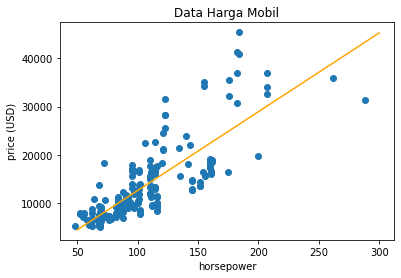

In [21]:
# optional: membuat visualisasi, misalkan model cuma 1 fitur kita bisa bikin grafik 2D fitur vs target dan garis regression nya

# data awal kita, fitur dan target yang kita pilih

plt.scatter(x=features, y=target)
plt.title("Data Harga Mobil")
plt.xlabel("horsepower")
plt.ylabel("price (USD)")


# garis regression
# kita buat prediksi dari horsepower 50-300 harga mobil berapa
# angka2 hasil prediksi kita plot jadi satu garis

x_dummy = np.arange(50, 301, 5).reshape(-1,1)
y_pred = model.predict(x_dummy)

plt.plot(x_dummy, y_pred, color="orange")

In [23]:
# walaupun di contoh ini kita hanya pakai 1 fitur, model bisa menerima banyak fitur sekaligus

# contoh berikut, linear regression menggunakan banyak fitur

In [24]:
# import data
df_car = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/CarPrice_Assignment.csv")
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [25]:
# rapikan data
# untuk contoh kali ini kita skip step ini dan asumsi data sudah rapi


In [27]:
# pilih fitur dan target
features = df_car[["horsepower", "wheelbase", "carlength", "carwidth", "carheight", "peakrpm", "citympg"]]
target = df_car["price"]

print(features.shape)
print(target.shape)

display(features.head())

(205, 7)
(205,)


,horsepower,wheelbase,carlength,carwidth,carheight,peakrpm,citympg
0,111,88.6,168.8,64.1,48.8,5000,21
1,111,88.6,168.8,64.1,48.8,5000,21
2,154,94.5,171.2,65.5,52.4,5000,19
3,102,99.8,176.6,66.2,54.3,5500,24
4,115,99.4,176.6,66.4,54.3,5500,18


In [28]:
# membuat dan melatih model
model = LinearRegression()

model.fit(features, target)

LinearRegression()

In [29]:
# evaluasi
model.score(features, target)

0.7671032774152682

In [31]:
# optional: bikin prediksi
# misal kita punya mobil yang horsepower 200, wheelbase 100, carlength 180, carwidth 70, carheight 50, peakrpm 8000, citympg 5
# berapa harga mobil ini?
print(model.predict([[200, 100, 180, 70, 50, 8000, 5]]))

# kalau mpg lebih hemat, bisa jalan lebih jauh per galon bensin, apakah harga mobil lebih mahal?
print(model.predict([[200, 100, 180, 70, 50, 8000, 25]]))

[25657.24707955]
[27365.31875591]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
# dari yang barusan kita prediksi, mpg lebih tinggi membuat mobil lebih mahal

# Polynomial Regression
regression menggunakan formula polynomial matematika, garisnya bisa berbelok (tidak linear, linear = lurus)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
# import data
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
# rapikan data

# skip dulu step ini, kecuali pemilihan fitur dan target

In [40]:
# fitur horsepower saja
# target price

fitur = df_car[["horsepower"]]
target = df_car["price"]

print(fitur.shape, target.shape)
display(fitur.head(3))

(205, 1) (205,)


,horsepower
0,111
1,111
2,154


In [42]:
# polynomial regression memerlukan data yang bentuknya ada kuadratnya untuk degree 2 (y = ax + bx2 + c)
# perlu data yang ada kubiknya untuk degree 3
# dan seterusnya

# jadi, data kita yang cuman ada x biasa, horsepower biasa, kita tambahkan versi horsepower kuadrat, kubik, dan lainnya
# sesuai polynomial mau degree berapa

# contoh: degree 2
transformer = PolynomialFeatures(degree=2, include_bias=False)

fitur_poly = transformer.fit_transform(fitur)

display(pd.DataFrame(fitur_poly).head(3))

,0,1
0,111.0,12321.0
1,111.0,12321.0
2,154.0,23716.0


In [ ]:
# fitur kita horsepower ditambahkan versi kuadratnya di polynomial degree 2

In [43]:
# buat dan latih model
model = LinearRegression()

model.fit(fitur_poly, target)

LinearRegression()

In [44]:
# evaluasi
model.score(fitur_poly, target)

0.6542798010860496

In [46]:
# optional: predict
# kalau horsepower 2000, harga mobil berapa?

model.predict([[2000, np.square(2000)]])

array([-56457.74882353])

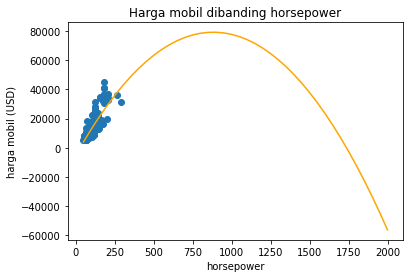

In [52]:
# optional: visualisasikan hasil garis regresi bandingkan dengan data fitur vs target

plt.scatter(x=fitur, y=target)
plt.title("Harga mobil dibanding horsepower")
plt.xlabel("horsepower")
plt.ylabel("harga mobil (USD)")

# coba buat garis regresi dari horsepower 50-300
x_dummy = np.arange(50,2001,50).reshape(-1,1)
# print(x_dummy[:5])

transformer = PolynomialFeatures(degree=2, include_bias=False)
x_dummy_poly = transformer.fit_transform(x_dummy)
# print(x_dummy_poly[:5])
y_pred = model.predict(x_dummy_poly)

plt.plot(x_dummy, y_pred, color="orange")

(205, 1) (205,)


,horsepower
0,111
1,111
2,154


,0,1,2,3,4,5,6,7,8,9
0,111.0,12321.0,1367631.0,151807041.0,1.685058e+10,1.870415e+12,2.076160e+14,2.304538e+16,2.558037e+18,2.839421e+20
1,111.0,12321.0,1367631.0,151807041.0,1.685058e+10,1.870415e+12,2.076160e+14,2.304538e+16,2.558037e+18,2.839421e+20
2,154.0,23716.0,3652264.0,562448656.0,8.661709e+10,1.333903e+13,2.054211e+15,3.163485e+17,4.871767e+19,7.502521e+21


R-squared: 0.6740887875272041
jika horsepower 2000 maka harga mobil adalah: [1.04162482e+16]


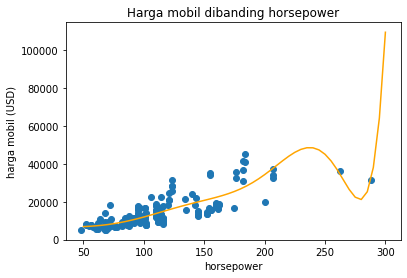

In [60]:
# bagaimana kalau degree nya n (3,4,5,...)
# silahkan ubah n untuk melihat efek degree berbeda pada hasil regression
n = 10

# load data
df_car = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/CarPrice_Assignment.csv")

# rapikan data
# skip check missing value, invalid value --> data cleaning supaya lebih akurat datanya
# skip encoding --> mengubah fitur tipe non-numerik jadi numerik. misal SUV = 0, Sedan = 1, hatchback = 2, ... dst
# skip scaling --> supaya fitur yang skala angka lebih besar tidak diberi lebih banyak importance, jumlah pintu 2,4 dibanding peakrpm 3000, 5000 jangan sampai peakrpm dianggap lebih penting hanya karena angka lebih banyak berubah, lebih besar
# skip pisahin data jadi train dan test data --> tujuannya untuk mengetahui model ngapain data training atau tidak

# pilih data yg fitur dan yang target
fitur = df_car[["horsepower"]]
target = df_car["price"]

print(fitur.shape, target.shape)
display(fitur.head(3))

# transform data jadi polynomial degree n
transformer = PolynomialFeatures(degree=n, include_bias=False)
fitur_poly = transformer.fit_transform(fitur)
display(pd.DataFrame(fitur_poly).head(3))

# buat dan latih model
model = LinearRegression()

model.fit(fitur_poly, target)

# evaluasi
print("R-squared:", model.score(fitur_poly, target))

# optional: predict
# kalau horsepower 2000, harga mobil berapa?
x_pred = np.array([[2000]])
x_pred_poly = transformer.fit_transform(x_pred)
print("jika horsepower 2000 maka harga mobil adalah:", model.predict(x_pred_poly))


# optional: visualisasikan hasil garis regresi bandingkan dengan data fitur vs target
plt.scatter(x=fitur, y=target)
plt.title("Harga mobil dibanding horsepower")
plt.xlabel("horsepower")
plt.ylabel("harga mobil (USD)")

# coba buat garis regresi dari horsepower 50-300
x_dummy = np.arange(50,301,5).reshape(-1,1)
# print(x_dummy[:5])

x_dummy_poly = transformer.fit_transform(x_dummy)
# print(x_dummy_poly[:5])
y_pred = model.predict(x_dummy_poly)

plt.plot(x_dummy, y_pred, color="orange")

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


Text(0, 0.5, 'harga properti (Jutaan Rupiah)')

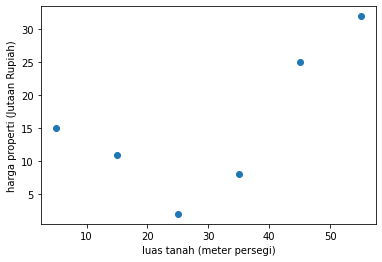

In [63]:
# tes data yang dibuat bentuknya cocok untuk polynomial regression

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

# fitur = x
# target = y

plt.scatter(x=x, y=y)
plt.xlabel("luas tanah (meter persegi)")
plt.ylabel("harga properti (Jutaan Rupiah)")

In [ ]:
# silahkan coba buat polynomial regression model dengan data car, atau data dummy diatas
